In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full tree segmentation CSV
df = pd.read_csv("./features_csvs/features_full_tree.csv")

# Make sure 'modality' and 'duration_s' columns exist
assert 'modality' in df.columns and 'duration_s' in df.columns


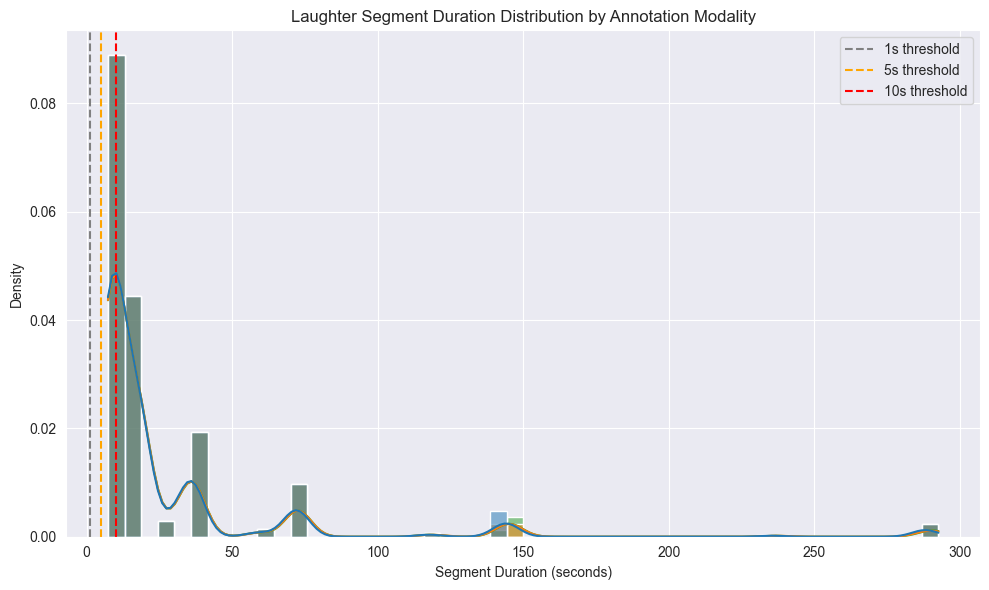

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="duration_s", hue="modality", bins=50, kde=True, stat="density", common_norm=False)
plt.axvline(1, color='gray', linestyle='--', label="1s threshold")
plt.axvline(5, color='orange', linestyle='--', label="5s threshold")
plt.axvline(10, color='red', linestyle='--', label="10s threshold")
plt.legend()
plt.title("Laughter Segment Duration Distribution by Annotation Modality")
plt.xlabel("Segment Duration (seconds)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [3]:
summary = df.groupby("modality")["duration_s"].describe(percentiles=[0.25, 0.5, 0.75, 0.9])
print("Summary of segment durations by modality:\n")
print(summary[["min", "25%", "50%", "75%", "max", "count"]])


Summary of segment durations by modality:

             min   25%   50%    75%     max    count
modality                                            
No_Audio    7.32  9.00  9.04  18.00  288.12  69552.0
Only_Audio  7.40  9.00  9.16  18.28  292.60  69552.0
With_Audio  7.36  9.08  9.12  18.20  291.24  69552.0


In [7]:
bins = [0, 1, 5, 10, float("inf")]
labels = ["<1s", "1-5s", "5-10s", ">10s"]
df["duration_bin"] = pd.cut(df["duration_s"], bins=bins, labels=labels, right=False)

duration_counts = df.groupby(["modality", "duration_bin"]).size().unstack(fill_value=0)
print("\nSegment counts per duration bucket and modality:\n")
print(duration_counts)



Segment counts per duration bucket and modality:

duration_bin  <1s  1-5s  5-10s   >10s
modality                             
No_Audio        0     0  35328  34224
Only_Audio      0     0  35328  34224
With_Audio      0     0  35328  34224


/var/folders/75/lrrp6ghd2csd748_l4sy8y0c0000gn/T/ipykernel_7623/4259017956.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_counts = df.groupby(["modality", "duration_bin"]).size().unstack(fill_value=0)


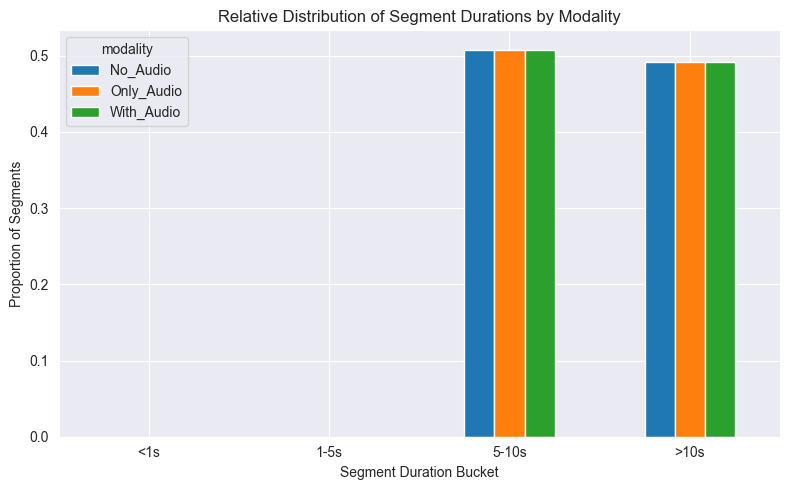

In [8]:
duration_counts_pct = duration_counts.div(duration_counts.sum(axis=1), axis=0)

duration_counts_pct.T.plot(kind="bar", figsize=(8, 5))
plt.title("Relative Distribution of Segment Durations by Modality")
plt.ylabel("Proportion of Segments")
plt.xlabel("Segment Duration Bucket")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
